# T0.00 Simple Data Loader Examples

## Purpose
This notebook is meant to show how different data loaders behave with our package.

### 1. Kaggle Bristol T1D


In [1]:
from src.data.diabetes_datasets.data_loader import get_loader

#### No Cache - Training Data Load

In [2]:
loader = get_loader(
    data_source_name="kaggle_brisT1D",
    dataset_type="train",
    keep_columns=[
        "datetime",
        "p_num",
        "bg_mM",
        "hr_bpm",
        "steps",
        "cals",
        "cob",
        "carb_availability",
        "dose_units",
        "iob",
        "insulin_availability",
    ],
    use_cached=False,
    parallel=True,
    max_workers=9,
)

2025-09-26T22:05:51 - ============================================================
2025-09-26T22:05:51 - Beginning data loading process with the following parmeters:
2025-09-26T22:05:51 - 	Dataset: kaggle_brisT1D - train
2025-09-26T22:05:51 - 	Columns: ['datetime', 'p_num', 'bg_mM', 'hr_bpm', 'steps', 'cals', 'cob', 'carb_availability', 'dose_units', 'iob', 'insulin_availability']
2025-09-26T22:05:51 - 	Generic patient start date: 2024-01-01 00:00:00
2025-09-26T22:05:51 - 	Number of validation days: 20
2025-09-26T22:05:51 - 	In parallel with up to 9 workers.

2025-09-26T22:05:51 - Processed cache not found or not used, processing raw data and saving to cache...
2025-09-26T22:05:51 - Raw data for kaggle_brisT1D already exists in cache
2025-09-26T22:06:01 - _process_raw_train_data: Processing train data. This may take a while...
2025-09-26T22:06:02 - Processing 9 patients:
2025-09-26T22:06:02 - Running process_single_patient_data(), 
			Processing patient p01 data...
			Patient start dat

In [3]:
for key, value in loader.processed_data.items():
    print(f"{key}: {value.shape}")

p06: (8791, 14)
p05: (8808, 14)
p01: (8711, 14)
p11: (25559, 14)
p12: (26371, 14)
p04: (24983, 14)
p10: (25803, 14)
p02: (26423, 14)
p03: (26423, 14)


The above should read (out of order):
- p06: (8791, 14)
- p05: (8808, 14)
- p01: (8711, 14)
- p12: (26371, 14)
- p11: (25559, 14)
- p03: (26423, 14)
- p02: (26423, 14)
- p10: (25803, 14)
- p04: (24983, 14)

#### Cached - Training Data Load

In [10]:
loader = get_loader(
    data_source_name="kaggle_brisT1D",
    dataset_type="train",
    keep_columns=[
        "datetime",
        "p_num",
        "bg_mM",
        "hr_bpm",
        "steps",
        "cals",
        "cob",
        "carb_availability",
        "dose_units",
        "iob",
        "insulin_availability",
    ],
    use_cached=True,
    parallel=True,
    max_workers=9,
)

2025-09-26T01:09:31 - ============================================================
2025-09-26T01:09:31 - Beginning data loading process with the following parmeters:
2025-09-26T01:09:31 - 	Dataset: kaggle_brisT1D - train
2025-09-26T01:09:31 - 	Columns: ['datetime', 'p_num', 'bg_mM', 'hr_bpm', 'steps', 'cals', 'cob', 'carb_availability', 'dose_units', 'iob', 'insulin_availability']
2025-09-26T01:09:31 - 	Generic patient start date: 2024-01-01 00:00:00
2025-09-26T01:09:31 - 	Number of validation days: 20
2025-09-26T01:09:31 - 	In parallel with up to 9 workers.

2025-09-26T01:09:31 - Processed data path for kaggle_brisT1D: /u6/cjrisi/nocturnal/cache/data/kaggle_brisT1D/processed
2025-09-26T01:09:31 - Loaded full processed data from cache for 9 patients
2025-09-26T01:09:31 - Processed data path for kaggle_brisT1D: /u6/cjrisi/nocturnal/cache/data/kaggle_brisT1D/processed
2025-09-26T01:09:31 - Loaded existing train/validation split from cache for 9 patients


In [11]:
for key, value in loader.processed_data.items():
    print(f"{key}: {value.shape}")

p10: (25803, 14)
p11: (25559, 14)
p01: (8711, 14)
p06: (8791, 14)
p05: (8808, 14)
p12: (26371, 14)
p02: (26423, 14)
p04: (24983, 14)
p03: (26423, 14)


The above should read (out of order):
- p06: (8791, 14)
- p05: (8808, 14)
- p01: (8711, 14)
- p12: (26371, 14)
- p11: (25559, 14)
- p03: (26423, 14)
- p02: (26423, 14)
- p10: (25803, 14)
- p04: (24983, 14)

#### Processed Training Data Results


##### Processed
This should be the full dataset that gets split into training and validation.

In [12]:
for p_num, df in loader.processed_data.items():
    print(f"Patient Number: {p_num}")
    print(f"DataFrame Shape: {df.shape}")
    print(f"Dataframe Head:\n{df.head()}\n")

Patient Number: p10
DataFrame Shape: (25803, 14)
Dataframe Head:
                        id p_num  bg_mM  dose_units  food_g  hr_bpm  steps  \
datetime                                                                     
2024-01-01 06:05:00  p10_0   p10    5.1      0.0000     NaN     NaN    NaN   
2024-01-01 06:10:00  p10_1   p10    5.4      0.0167     NaN     NaN    NaN   
2024-01-01 06:15:00  p10_2   p10    5.2      0.0696     NaN     NaN    NaN   
2024-01-01 06:20:00  p10_3   p10    5.1      0.0614     NaN     NaN    NaN   
2024-01-01 06:25:00  p10_4   p10    4.9      0.0262     NaN     NaN    NaN   

                     cals activity msg_type  cob  carb_availability  \
datetime                                                              
2024-01-01 06:05:00   NaN      NaN      NaN  0.0                0.0   
2024-01-01 06:10:00   NaN      NaN      NaN  0.0                0.0   
2024-01-01 06:15:00   NaN      NaN      NaN  0.0                0.0   
2024-01-01 06:20:00   NaN      Na

##### Training Data
This should be approximately the first 60-70 days per patient.

In [13]:
for p_num, df in loader.train_data.items():
    print(f"Patient Number: {p_num}")
    print(f"DataFrame Shape: {df.shape}")
    print(f"Dataframe Head:\n{df.head()}\n")

Patient Number: p06
DataFrame Shape: (6802, 14)
Dataframe Head:
                        id p_num  bg_mM  dose_units  food_g  hr_bpm  steps  \
datetime                                                                     
2024-01-01 10:25:00  p06_0   p06   11.4      0.0833     NaN     NaN    NaN   
2024-01-01 10:40:00  p06_1   p06   11.3      0.0833     NaN     NaN    NaN   
2024-01-01 10:55:00  p06_2   p06   10.9      0.0833     NaN     NaN    NaN   
2024-01-01 11:10:00  p06_3   p06   10.4      0.0833     NaN     NaN    NaN   
2024-01-01 11:25:00  p06_4   p06   10.4      0.0833     NaN     NaN    NaN   

                     cals activity msg_type  cob  carb_availability  \
datetime                                                              
2024-01-01 10:25:00   NaN      NaN      NaN  0.0                0.0   
2024-01-01 10:40:00   NaN      NaN      NaN  0.0                0.0   
2024-01-01 10:55:00   NaN      NaN      NaN  0.0                0.0   
2024-01-01 11:10:00   NaN      NaN

##### Validation Data

This should be about the last 20 days per patient.

In [14]:
for p_num, df in loader.validation_data.items():
    print(f"Patient Number: {p_num}")
    print(f"DataFrame Shape: {df.shape}")
    print(f"Dataframe Head:\n{df.head()}\n")

Patient Number: p06
DataFrame Shape: (1921, 14)
Dataframe Head:
                           id p_num  bg_mM  dose_units  food_g  hr_bpm  steps  \
datetime                                                                        
2024-03-12 06:55:00  p06_6437   p06   20.3      0.0833     NaN    57.6    0.0   
2024-03-12 07:10:00  p06_6438   p06   21.7      0.0833     NaN    65.8   58.0   
2024-03-12 07:25:00  p06_6439   p06   22.8      0.0833     NaN    60.5    4.0   
2024-03-12 07:40:00  p06_6440   p06   21.9      4.3333    30.0    60.7   10.0   
2024-03-12 07:55:00  p06_6441   p06   19.9      0.0833     NaN    58.4    0.0   

                      cals activity       msg_type   cob  carb_availability  \
datetime                                                                      
2024-03-12 06:55:00  13.58      NaN            NaN   0.0                0.0   
2024-03-12 07:10:00  17.90      NaN            NaN   0.0                0.0   
2024-03-12 07:25:00  16.05      NaN            NaN  

##### Daily Forecast Iterator

**00:00 - 06:00**

You can now use the data loader to pass the validation or training data to `iter_daily_forecast_periods()` which is customizable for your time specific forecasting windows. The default is a context window of 6:00am - 12:00am and a forecast window of 12:00am to 6:00am

In [15]:
import pandas as pd
from src.data.preprocessing.time_processing import iter_daily_context_forecast_splits

pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
pd.set_option("display.max_colwidth", None)

p01_df = loader.validation_data["p01"]
p01_val_iterator = iter_daily_context_forecast_splits(p01_df)

count = 0
for context_df, forecast_df in p01_val_iterator:
    print(
        f"Forecast Start: {forecast_df.index.min()}, Forecast End: {forecast_df.index.max()}"
    )
    print(
        f"Context Data:\n {context_df[['p_num', 'bg_mM', 'cob', 'dose_units']].head()}\n"
    )
    print(
        f"Forecast Data Head:\n {forecast_df[['p_num', 'bg_mM', 'cob', 'dose_units']].head(2)}\n"
    )
    print(
        f"Forecast Data Tail:\n {forecast_df[['p_num', 'bg_mM', 'cob', 'dose_units']].tail(2)}\n"
    )
    print("-" * 40)
    count += 1
    if count > 25:  # Limit output for brevity
        break
print(f"Total Forecasts Processed: {count}")

Forecast Start: 2024-03-12 00:10:00, Forecast End: 2024-03-12 05:55:00
Context Data:
                     p_num  bg_mM  cob  dose_units
datetime                                         
2024-03-11 06:55:00   NaN    NaN  0.0         NaN
2024-03-11 07:10:00   p01    NaN  0.0      0.0417
2024-03-11 07:25:00   p01    NaN  0.0      0.0417
2024-03-11 07:40:00   p01    NaN  0.0      0.0417
2024-03-11 07:55:00   p01    NaN  0.0      0.0417

Forecast Data Head:
                     p_num  bg_mM  cob  dose_units
datetime                                         
2024-03-12 00:10:00   p01    6.9  0.0      0.0083
2024-03-12 00:25:00   p01    6.4  0.0      0.0083

Forecast Data Tail:
                     p_num  bg_mM  cob  dose_units
datetime                                         
2024-03-12 05:40:00   p01    NaN  0.0      0.0583
2024-03-12 05:55:00   p01   16.8  0.0      0.0583

----------------------------------------
Forecast Start: 2024-03-13 00:10:00, Forecast End: 2024-03-13 05:55:00
Context

**22:00 - 06:00**

In [16]:
import pandas as pd
from src.data.preprocessing.time_processing import iter_daily_context_forecast_splits

pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
pd.set_option("display.max_colwidth", None)

p01_df = loader.validation_data["p02"]
p01_val_iterator = iter_daily_context_forecast_splits(
    p01_df, context_period=(6, 22), forecast_horizon=(22, 6)
)

count = 0
for context_df, forecast_df in p01_val_iterator:
    print(
        f"Forecast Start: {forecast_df.index.min()}, Forecast End: {forecast_df.index.max()}"
    )
    print(
        f"Context Data:\n {context_df[['p_num', 'bg_mM', 'cob', 'dose_units']].head()}\n"
    )
    print(
        f"Forecast Data Head:\n {forecast_df[['p_num', 'bg_mM', 'cob', 'dose_units']].head(2)}\n"
    )
    print(
        f"Forecast Data Tail:\n {forecast_df[['p_num', 'bg_mM', 'cob', 'dose_units']].tail(2)}\n"
    )
    print("-" * 40)
    count += 1
    if count > 25:  # Limit output for brevity
        break
print(f"Total Forecasts Processed: {count}")

Forecast Start: 2024-03-12 22:00:00, Forecast End: 2024-03-13 05:55:00
Context Data:
                     p_num  bg_mM  cob  dose_units
datetime                                         
2024-03-12 06:55:00   p02    6.9  0.0      0.0583
2024-03-12 07:00:00   p02    7.2  0.0      0.0583
2024-03-12 07:05:00   p02    7.4  0.0      0.0583
2024-03-12 07:10:00   p02    7.3  0.0      0.0583
2024-03-12 07:15:00   p02    7.4  0.0      0.0583

Forecast Data Head:
                     p_num  bg_mM  cob  dose_units
datetime                                         
2024-03-12 22:00:00   p02    7.7  0.0      0.0627
2024-03-12 22:05:00   p02    7.2  0.0      0.0251

Forecast Data Tail:
                     p_num  bg_mM  cob  dose_units
datetime                                         
2024-03-13 05:50:00   p02    7.6  0.0        0.05
2024-03-13 05:55:00   p02    7.6  0.0        0.05

----------------------------------------
Forecast Start: 2024-03-13 22:00:00, Forecast End: 2024-03-14 05:55:00
Context

In [18]:
print(f"Number of patients in the dataset: {loader.num_patients}")
print(f"Patient IDs: {loader.patient_ids}")
print(f"Data shapes: {loader.train_data_shape_summary}")

Number of patients in the dataset: 9
Patient IDs: ['p10', 'p11', 'p01', 'p06', 'p05', 'p12', 'p02', 'p04', 'p03']
Data shapes: {'p10': (25803, 14), 'p11': (25559, 14), 'p01': (8711, 14), 'p06': (8791, 14), 'p05': (8808, 14), 'p12': (26371, 14), 'p02': (26423, 14), 'p04': (24983, 14), 'p03': (26423, 14)}


#### No Cache - Testing Data Load
For Kaggle the testing data is already provided and is in a format that is quite different from the training set. This should not be considered true testing data outside of a few special use cases. 

If you want a proper train/val/test split we suggest splitting validation into two 10-day datasets. Or a 15-day and 5-day dataset.

In [2]:
from src.data.diabetes_datasets.data_loader import get_loader

In [3]:
loader = get_loader(
    data_source_name="kaggle_brisT1D",
    dataset_type="test",
    keep_columns=[
        "datetime",
        "p_num",
        "bg_mM",
        "hr_bpm",
        "steps",
        "cals",
        "cob",
        "carb_availability",
        "dose_units",
        "iob",
        "insulin_availability",
    ],
    use_cached=False,
    parallel=True,
    max_workers=8,
)

2025-09-05T21:26:42 - ============================================================
2025-09-05T21:26:42 - Beginning data loading process with the following parmeters:
2025-09-05T21:26:42 - 	Dataset: kaggle_brisT1D - test
2025-09-05T21:26:42 - 	Columns: ['datetime', 'p_num', 'bg_mM', 'hr_bpm', 'steps', 'cals', 'cob', 'carb_availability', 'dose_units', 'iob', 'insulin_availability']
2025-09-05T21:26:42 - 	Generic patient start date: 2024-01-01 00:00:00
2025-09-05T21:26:42 - 	In parallel with up to 8 workers.

2025-09-05T21:26:42 - Processed cache not found or not used, processing raw data and saving to cache...
2025-09-05T21:26:42 - Raw data for kaggle_brisT1D already exists in cache
2025-09-05T21:26:42 - Processing test data. This may take a while...
2025-09-05T21:28:23 - Processed data path for kaggle_brisT1D: /u6/cjrisi/nocturnal/cache/data/kaggle_brisT1D/processed
2025-09-05T21:28:23 - Processed test data will be cached at: /u6/cjrisi/nocturnal/cache/data/kaggle_brisT1D/processed/test

#### Cached - Testing Data Load

In [6]:
loader = get_loader(
    data_source_name="kaggle_brisT1D",
    dataset_type="test",
    keep_columns=[
        "datetime",
        "p_num",
        "bg_mM",
        "hr_bpm",
        "steps",
        "cals",
        "cob",
        "carb_availability",
        "dose_units",
        "iob",
        "insulin_availability",
    ],
    use_cached=True,
    parallel=True,
    max_workers=8,
)

2025-09-05T21:36:28 - ============================================================
2025-09-05T21:36:28 - Beginning data loading process with the following parmeters:
2025-09-05T21:36:28 - 	Dataset: kaggle_brisT1D - test
2025-09-05T21:36:28 - 	Columns: ['datetime', 'p_num', 'bg_mM', 'hr_bpm', 'steps', 'cals', 'cob', 'carb_availability', 'dose_units', 'iob', 'insulin_availability']
2025-09-05T21:36:28 - 	Generic patient start date: 2024-01-01 00:00:00
2025-09-05T21:36:28 - 	In parallel with up to 8 workers.

2025-09-05T21:36:28 - Processed data path for kaggle_brisT1D: /u6/cjrisi/nocturnal/cache/data/kaggle_brisT1D/processed
2025-09-05T21:36:28 - Processed data path for kaggle_brisT1D: /u6/cjrisi/nocturnal/cache/data/kaggle_brisT1D/processed
2025-09-05T21:36:29 - Loaded nested test data from cache
2025-09-05T21:36:29 - Loaded data for 15 patients
2025-09-05T21:36:29 - Loaded nested test data from compressed cache


#### Processed Test Data Results

In [7]:
for p_num, data_dict in loader.processed_data.items():
    print(f"Patient Number: {p_num}")
    for row_id, df in data_dict.items():
        print(f"Row ID: {row_id}")
        print(f"DataFrame Shape: {df.shape}\n")

Patient Number: p01
Row ID: p01_8459
DataFrame Shape: (72, 12)

Row ID: p01_8460
DataFrame Shape: (72, 12)

Row ID: p01_8461
DataFrame Shape: (72, 12)

Row ID: p01_8462
DataFrame Shape: (72, 12)

Row ID: p01_8463
DataFrame Shape: (72, 12)

Row ID: p01_8464
DataFrame Shape: (72, 12)

Row ID: p01_8465
DataFrame Shape: (72, 12)

Row ID: p01_8466
DataFrame Shape: (72, 12)

Row ID: p01_8467
DataFrame Shape: (72, 12)

Row ID: p01_8468
DataFrame Shape: (72, 12)

Row ID: p01_8469
DataFrame Shape: (72, 12)

Row ID: p01_8470
DataFrame Shape: (72, 12)

Row ID: p01_8471
DataFrame Shape: (72, 12)

Row ID: p01_8472
DataFrame Shape: (72, 12)

Row ID: p01_8473
DataFrame Shape: (72, 12)

Row ID: p01_8474
DataFrame Shape: (72, 12)

Row ID: p01_8475
DataFrame Shape: (72, 12)

Row ID: p01_8476
DataFrame Shape: (72, 12)

Row ID: p01_8477
DataFrame Shape: (72, 12)

Row ID: p01_8478
DataFrame Shape: (72, 12)

Row ID: p01_8479
DataFrame Shape: (72, 12)

Row ID: p01_8480
DataFrame Shape: (72, 12)

Row ID: p01_

In [8]:
loader.processed_data["p24"]["p24_260"]

bg_mM  dose_units  food_g  hr_bpm  steps   cals  \
datetime                                                               
2024-01-01 21:15:00    9.9      0.0792     NaN    76.8   58.0   8.04   
2024-01-01 21:20:00   10.1      0.0792     NaN    84.4   98.0  11.04   
2024-01-01 21:25:00   10.0      0.0792     NaN    84.8   30.0   9.87   
2024-01-01 21:30:00    9.9      0.0792     NaN    91.9   29.0   8.88   
2024-01-01 21:35:00   10.0      0.0792     NaN    81.7   29.0   7.38   
...                    ...         ...     ...     ...    ...    ...   
2024-01-02 02:50:00    6.4      0.0771     NaN    72.7    0.0   4.31   
2024-01-02 02:55:00    6.4      0.0000     NaN    71.8    NaN   4.15   
2024-01-02 03:00:00    6.4      0.0000     NaN    76.2    0.0   4.23   
2024-01-02 03:05:00    6.5      0.0327     NaN    70.5    NaN   4.15   
2024-01-02 03:10:00    6.4      0.0771     NaN    73.9    NaN   4.15   

                     activity p_num  cob  carb_availability  \
datetime                                                      
2024-01-01 21:15:00       NaN   p24  0.0                0.0   
2024-01-01 21:20:00       NaN   p24  0.0                0.0   
2024-01-01 21:25:00       NaN   p24  0.0                0.0   
2024-01-01 21:30:00       NaN   p24  0.0                0.0   
2024-01-01 21:35:00       NaN   p24  0.0                0.0   
...                       ...   ...  ...                ...   
2024-01-02 02:50:00       NaN   p24  0.0                0.0   
2024-01-02 02:55:00       NaN   p24  0.0                0.0   
2024-01-02 03:00:00       NaN   p24  0.0                0.0   
2024-01-02 03:05:00       NaN   p24  0.0                0.0   
2024-01-02 03:10:00       NaN   p24  0.0                0.0   

                     insulin_availability       iob  
datetime                                             
2024-01-01 21:15:00              0.000000  0.079200  
2024-01-01 21:20:00              0.000000  0.158400  
2024-01-01 21:25:00              0.000000  0.237600  
2024-01-01 21:30:00              0.000655  0.316800  
2024-01-01 21:35:00              0.002048  0.395548  
...                                   ...       ...  
2024-01-02 02:50:00              0.109248  2.349364  
2024-01-02 02:55:00              0.113737  2.259138  
2024-01-02 03:00:00              0.117266  2.165815  
2024-01-02 03:05:00              0.119963  2.102757  
2024-01-02 03:10:00              0.121423  2.083342  

[72 rows x 12 columns]

### 2. Lynch 2022 Dataset

Ensure the Lynch 2022 dataset files are downloaded from https://public.jaeb.org/dataset/579 
and placed in the appropriate directory before running.

In [1]:
import sys
import pathlib

# dunno how to run this without doin this ugly hack
sys.path.insert(
    0,
    str(
        pathlib.Path(
            r"C:\Users\jonat\Documents\Code\nocturnal-hypo-gly-prob-forecast"
        ).resolve()
    ),
)

from src.data.diabetes_datasets.data_loader import get_loader

#### No Cache - Lynch 2022 Data Load

In [ ]:
# didnt run the whole thing cuz it takes forever you'll need to trust me it works
loader = get_loader(
    data_source_name="lynch_2022",
    keep_columns=[
        "datetime",
        "p_num",
        "bg_mM",
    ],
    use_cached=False,
    parallel=True,
    max_workers=8,
)

2025-10-15T17:31:28 - ============================================================
2025-10-15T17:31:28 - Beginning data loading process with the following parameters:
2025-10-15T17:31:28 - 	Dataset: lynch_2022 - train
2025-10-15T17:31:28 - 	Columns: ['datetime', 'p_num', 'bg_mM']
2025-10-15T17:31:28 - 	Generic patient start date: 2024-01-01 00:00:00
2025-10-15T17:31:28 - 	Number of validation days: 20
2025-10-15T17:31:28 - 	In parallel with up to 8 workers.

2025-10-15T17:31:28 - Processed cache not found or not used, processing raw data and saving to cache...
2025-10-15T17:31:28 - Loading Lynch 2022 raw data from c:\Users\jonat\Documents\Code\nocturnal-hypo-gly-prob-forecast\cache\data\awesome_cgm\lynch_2022\raw\IOBP2 RCT Public Dataset\Data Tables in SAS


In [3]:
print(f"Number of patients in the dataset: {loader.num_patients}")
print(f"Patient IDs: {loader.patient_ids}")
print("\nData shapes:")
for key, value in loader.data_shape_summary.items():
    print(f"{key}: {value}")

Number of patients in the dataset: 343
Patient IDs: ['lynch_100', 'lynch_101', 'lynch_103', 'lynch_105', 'lynch_107', 'lynch_10', 'lynch_111', 'lynch_112', 'lynch_113', 'lynch_116', 'lynch_119', 'lynch_121', 'lynch_125', 'lynch_126', 'lynch_128', 'lynch_12', 'lynch_130', 'lynch_131', 'lynch_133', 'lynch_134', 'lynch_135', 'lynch_137', 'lynch_138', 'lynch_139', 'lynch_13', 'lynch_141', 'lynch_143', 'lynch_144', 'lynch_146', 'lynch_148', 'lynch_151', 'lynch_153', 'lynch_154', 'lynch_155', 'lynch_156', 'lynch_158', 'lynch_160', 'lynch_162', 'lynch_163', 'lynch_164', 'lynch_166', 'lynch_167', 'lynch_168', 'lynch_170', 'lynch_171', 'lynch_173', 'lynch_176', 'lynch_177', 'lynch_178', 'lynch_17', 'lynch_181', 'lynch_182', 'lynch_183', 'lynch_184', 'lynch_185', 'lynch_186', 'lynch_187', 'lynch_188', 'lynch_189', 'lynch_18', 'lynch_191', 'lynch_193', 'lynch_194', 'lynch_195', 'lynch_198', 'lynch_199', 'lynch_200', 'lynch_202', 'lynch_203', 'lynch_205', 'lynch_206', 'lynch_207', 'lynch_209', 'ly

#### Cached - Lynch 2022 Data Load

In [2]:
loader = get_loader(
    data_source_name="lynch_2022",
    keep_columns=[
        "datetime",
        "p_num",
        "bg_mM",
    ],
    use_cached=True,
    parallel=True,
    max_workers=8,
)

2025-11-09T14:31:04 - ============================================================
2025-11-09T14:31:04 - Beginning data loading process with the following parameters:
2025-11-09T14:31:04 - 	Dataset: lynch_2022 - train
2025-11-09T14:31:04 - 	Columns: ['datetime', 'p_num', 'bg_mM']
2025-11-09T14:31:04 - 	Generic patient start date: 2024-01-01 00:00:00
2025-11-09T14:31:04 - 	Number of validation days: 20
2025-11-09T14:31:04 - 	In parallel with up to 8 workers.

2025-11-09T14:31:04 - Processed data path for lynch_2022: c:\Users\jonat\Documents\Code\nocturnal-hypo-gly-prob-forecast\cache\data\awesome_cgm\lynch_2022\processed


C:\Users\jonat\Documents\Code\nocturnal-hypo-gly-prob-forecast\src\data\cache_manager.py:493: DtypeWarning: Columns (1,9,11,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file, index_col=0, parse_dates=True)
C:\Users\jonat\Documents\Code\nocturnal-hypo-gly-prob-forecast\src\data\cache_manager.py:493: DtypeWarning: Columns (1,9,11,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file, index_col=0, parse_dates=True)
C:\Users\jonat\Documents\Code\nocturnal-hypo-gly-prob-forecast\src\data\cache_manager.py:493: DtypeWarning: Columns (1,9,11,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file, index_col=0, parse_dates=True)
2025-11-09T14:31:33 - Loaded full processed data from cache for 343 patients
2025-11-09T14:31:33 - Processed data path for lynch_2022: c:\Users\jonat\Documents\Code\nocturnal-hypo-gly-prob-forecast\cache\d

In [4]:
print(f"Number of patients in the dataset: {loader.num_patients}")
print(f"Patient IDs: {loader.patient_ids}")
print("\nData shapes:")
for key, value in loader.data_shape_summary.items():
    print(f"{key}: {value}")

Number of patients in the dataset: 343
Patient IDs: ['lynch_100', 'lynch_101', 'lynch_103', 'lynch_105', 'lynch_107', 'lynch_10', 'lynch_111', 'lynch_112', 'lynch_113', 'lynch_116', 'lynch_119', 'lynch_121', 'lynch_125', 'lynch_126', 'lynch_128', 'lynch_12', 'lynch_130', 'lynch_131', 'lynch_133', 'lynch_134', 'lynch_135', 'lynch_137', 'lynch_138', 'lynch_139', 'lynch_13', 'lynch_141', 'lynch_143', 'lynch_144', 'lynch_146', 'lynch_148', 'lynch_151', 'lynch_153', 'lynch_154', 'lynch_155', 'lynch_156', 'lynch_158', 'lynch_160', 'lynch_162', 'lynch_163', 'lynch_164', 'lynch_166', 'lynch_167', 'lynch_168', 'lynch_170', 'lynch_171', 'lynch_173', 'lynch_176', 'lynch_177', 'lynch_178', 'lynch_17', 'lynch_181', 'lynch_182', 'lynch_183', 'lynch_184', 'lynch_185', 'lynch_186', 'lynch_187', 'lynch_188', 'lynch_189', 'lynch_18', 'lynch_191', 'lynch_193', 'lynch_194', 'lynch_195', 'lynch_198', 'lynch_199', 'lynch_200', 'lynch_202', 'lynch_203', 'lynch_205', 'lynch_206', 'lynch_207', 'lynch_209', 'ly

#### Processed Lynch 2022 Data Results

##### Processed
This should be the full dataset that gets split into training and validation.

In [7]:
for p_num, df in list(loader.processed_data.items())[:3]:  # Show first 3 patients
    print(f"Patient Number: {p_num}")
    print(f"DataFrame Shape: {df.shape}")
    print(f"Dataframe Head:\n{df.head()}\n")
    print("-" * 60)

Patient Number: lynch_100
DataFrame Shape: (26212, 19)
Dataframe Head:
                         p_num     bg_mM  dose_units  food_g  hr_bpm  steps  \
datetime                                                                      
2020-12-27 11:38:21  lynch_100  6.055556       0.000     0.0     NaN    NaN   
2020-12-27 11:43:21  lynch_100  6.166667       0.020     0.0     NaN    NaN   
2020-12-27 11:48:21  lynch_100  6.444444       0.045     0.0     NaN    NaN   
2020-12-27 11:53:21  lynch_100  6.388889       0.020     0.0     NaN    NaN   
2020-12-27 11:58:21  lynch_100  6.277778       0.035     0.0     NaN    NaN   

                     cals  activity msg_type   age sex  insulinModality  type  \
datetime                                                                        
2020-12-27 11:38:21   NaN       NaN       bg  22.0   F              1.0   1.0   
2020-12-27 11:43:21   NaN       NaN       bg  22.0   F              1.0   1.0   
2020-12-27 11:48:21   NaN       NaN       bg  22.0 

In [8]:
for p_num, df in list(loader.train_data.items())[:3]:  # Show first 3 patients
    print(f"Patient Number: {p_num}")
    print(f"DataFrame Shape: {df.shape}")
    print(f"Dataframe Head:\n{df.head()}\n")
    print("-" * 60)

Patient Number: lynch_10
DataFrame Shape: (44723, 19)
Dataframe Head:
                        p_num      bg_mM  dose_units  food_g  hr_bpm  steps  \
datetime                                                                      
2019-11-12 00:00:18  lynch_10   9.611111       0.090     0.0     NaN    NaN   
2019-11-12 00:05:18  lynch_10  10.000000       0.175     0.0     NaN    NaN   
2019-11-12 00:10:18  lynch_10  10.444444       0.260     0.0     NaN    NaN   
2019-11-12 00:15:18  lynch_10  10.888889       0.285     0.0     NaN    NaN   
2019-11-12 00:20:18  lynch_10  11.333333       0.280     0.0     NaN    NaN   

                     cals  activity msg_type  age sex  insulinModality  type  \
datetime                                                                       
2019-11-12 00:00:18   NaN       NaN       bg  8.0   F              1.0   1.0   
2019-11-12 00:05:18   NaN       NaN       bg  8.0   F              1.0   1.0   
2019-11-12 00:10:18   NaN       NaN       bg  8.0   F   

##### Validation Data
This should be about the last 20 days per patient.

In [9]:
for p_num, df in list(loader.validation_data.items())[:3]:  # Show first 3 patients
    print(f"Patient Number: {p_num}")
    print(f"DataFrame Shape: {df.shape}")
    print(f"Dataframe Head:\n{df.tail()}\n")
    print("-" * 60)

Patient Number: lynch_10
DataFrame Shape: (5761, 19)
Dataframe Head:
                    p_num  bg_mM  dose_units  food_g  hr_bpm  steps  cals  \
datetime                                                                    
2020-05-05 06:35:18   NaN    NaN         NaN     NaN     NaN    NaN   NaN   
2020-05-05 06:40:18   NaN    NaN         NaN     NaN     NaN    NaN   NaN   
2020-05-05 06:45:18   NaN    NaN         NaN     NaN     NaN    NaN   NaN   
2020-05-05 06:50:18   NaN    NaN         NaN     NaN     NaN    NaN   NaN   
2020-05-05 06:55:18   NaN    NaN         NaN     NaN     NaN    NaN   NaN   

                     activity msg_type  age  sex  insulinModality  type  \
datetime                                                                  
2020-05-05 06:35:18       NaN      NaN  NaN  NaN              NaN   NaN   
2020-05-05 06:40:18       NaN      NaN  NaN  NaN              NaN   NaN   
2020-05-05 06:45:18       NaN      NaN  NaN  NaN              NaN   NaN   
2020-05-05 06:50

##### Daily Forecast Iterator

**00:00 - 06:00**

Using the Lynch 2022 validation data with the daily forecast iterator.

In [11]:
import pandas as pd
from src.data.preprocessing.time_processing import iter_daily_context_forecast_splits

pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
pd.set_option("display.max_colwidth", None)

p01_df = loader.validation_data["lynch_100"]
p01_val_iterator = iter_daily_context_forecast_splits(p01_df)

count = 0
for context_df, forecast_df in p01_val_iterator:
    print(
        f"Forecast Start: {forecast_df.index.min()}, Forecast End: {forecast_df.index.max()}"
    )
    print(
        f"Context Data:\n {context_df[['p_num', 'bg_mM', 'cob', 'dose_units']].head()}\n"
    )
    print(
        f"Forecast Data Head:\n {forecast_df[['p_num', 'bg_mM', 'cob', 'dose_units']].head(2)}\n"
    )
    print(
        f"Forecast Data Tail:\n {forecast_df[['p_num', 'bg_mM', 'cob', 'dose_units']].tail(2)}\n"
    )
    print("-" * 40)
    count += 1
    if count > 25:  # Limit output for brevity
        break
print(f"Total Forecasts Processed: {count}")

Forecast Start: 2021-03-09 00:03:21, Forecast End: 2021-03-09 05:58:21
Context Data:
                          p_num     bg_mM  cob  dose_units
datetime                                                 
2021-03-08 06:58:21  lynch_100  7.500000  0.0       0.410
2021-03-08 07:03:21  lynch_100  7.500000  0.0       0.240
2021-03-08 07:08:21  lynch_100  7.388889  0.0       0.190
2021-03-08 07:13:21  lynch_100  7.333333  0.0       0.215
2021-03-08 07:18:21  lynch_100  7.222222  0.0       0.185

Forecast Data Head:
                          p_num     bg_mM  cob  dose_units
datetime                                                 
2021-03-09 00:03:21  lynch_100  4.500000  0.0         0.0
2021-03-09 00:08:21  lynch_100  4.277778  0.0         0.0

Forecast Data Tail:
                          p_num      bg_mM  cob  dose_units
datetime                                                  
2021-03-09 05:53:21  lynch_100  11.166667  0.0       0.000
2021-03-09 05:58:21  lynch_100  10.833333  0.0       0.

**22:00 - 06:00**

Evening to morning forecast window with Lynch 2022 data.

In [12]:
import pandas as pd
from src.data.preprocessing.time_processing import iter_daily_context_forecast_splits

pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
pd.set_option("display.max_colwidth", None)

p01_df = loader.validation_data["lynch_100"]
p01_val_iterator = iter_daily_context_forecast_splits(
    p01_df, context_period=(6, 22), forecast_horizon=(22, 6)
)

count = 0
for context_df, forecast_df in p01_val_iterator:
    print(
        f"Forecast Start: {forecast_df.index.min()}, Forecast End: {forecast_df.index.max()}"
    )
    print(
        f"Context Data:\n {context_df[['p_num', 'bg_mM', 'cob', 'dose_units']].head()}\n"
    )
    print(
        f"Forecast Data Head:\n {forecast_df[['p_num', 'bg_mM', 'cob', 'dose_units']].head(2)}\n"
    )
    print(
        f"Forecast Data Tail:\n {forecast_df[['p_num', 'bg_mM', 'cob', 'dose_units']].tail(2)}\n"
    )
    print("-" * 40)
    count += 1
    if count > 25:  # Limit output for brevity
        break
print(f"Total Forecasts Processed: {count}")

Forecast Start: 2021-03-08 22:03:21, Forecast End: 2021-03-09 05:58:21
Context Data:
                          p_num     bg_mM  cob  dose_units
datetime                                                 
2021-03-08 06:58:21  lynch_100  7.500000  0.0       0.410
2021-03-08 07:03:21  lynch_100  7.500000  0.0       0.240
2021-03-08 07:08:21  lynch_100  7.388889  0.0       0.190
2021-03-08 07:13:21  lynch_100  7.333333  0.0       0.215
2021-03-08 07:18:21  lynch_100  7.222222  0.0       0.185

Forecast Data Head:
                          p_num      bg_mM  cob  dose_units
datetime                                                  
2021-03-08 22:03:21  lynch_100  10.388889  0.0         0.0
2021-03-08 22:08:21  lynch_100   8.666667  0.0         0.0

Forecast Data Tail:
                          p_num      bg_mM  cob  dose_units
datetime                                                  
2021-03-09 05:53:21  lynch_100  11.166667  0.0       0.000
2021-03-09 05:58:21  lynch_100  10.833333  0.0     

In [13]:
print(f"Number of patients in the dataset: {loader.num_patients}")
print(f"Patient IDs: {loader.patient_ids}")

Number of patients in the dataset: 343
Patient IDs: ['lynch_100', 'lynch_101', 'lynch_103', 'lynch_105', 'lynch_107', 'lynch_10', 'lynch_111', 'lynch_112', 'lynch_113', 'lynch_116', 'lynch_119', 'lynch_121', 'lynch_125', 'lynch_126', 'lynch_128', 'lynch_12', 'lynch_130', 'lynch_131', 'lynch_133', 'lynch_134', 'lynch_135', 'lynch_137', 'lynch_138', 'lynch_139', 'lynch_13', 'lynch_141', 'lynch_143', 'lynch_144', 'lynch_146', 'lynch_148', 'lynch_151', 'lynch_153', 'lynch_154', 'lynch_155', 'lynch_156', 'lynch_158', 'lynch_160', 'lynch_162', 'lynch_163', 'lynch_164', 'lynch_166', 'lynch_167', 'lynch_168', 'lynch_170', 'lynch_171', 'lynch_173', 'lynch_176', 'lynch_177', 'lynch_178', 'lynch_17', 'lynch_181', 'lynch_182', 'lynch_183', 'lynch_184', 'lynch_185', 'lynch_186', 'lynch_187', 'lynch_188', 'lynch_189', 'lynch_18', 'lynch_191', 'lynch_193', 'lynch_194', 'lynch_195', 'lynch_198', 'lynch_199', 'lynch_200', 'lynch_202', 'lynch_203', 'lynch_205', 'lynch_206', 'lynch_207', 'lynch_209', 'ly

Usage of validation table

there isn't any time series carb data for lynch

In [3]:
validation_table = loader.create_validation_table()
print(validation_table.head())

  patient_id  num_days  num_data_points          start_date  \
0  lynch_100        92            26212 2020-12-27 11:38:21   
1  lynch_101        92            26204 2020-05-15 11:55:12   
2  lynch_103        93            26488 2021-01-08 15:23:14   
3  lynch_105        97            27716 2020-09-08 12:03:04   
4  lynch_107       217            62392 2020-07-13 00:04:15   

             end_date date_type   age sex  avg_bg_mM  min_bg_mM  max_bg_mM  \
0 2021-03-28 11:53:21      real  22.0   F   9.256336   2.166667  22.277778   
1 2020-08-14 11:30:12      real  11.0   M   8.281951   2.166667  19.000000   
2 2021-04-10 14:38:14      real   2.0   M   9.126888   2.166667  22.277778   
3 2020-12-13 17:38:04      real  13.0   M   8.140762   2.166667  22.277778   
4 2021-02-14 15:19:15      real   4.0   M   9.514920   2.166667  22.277778   

   avg_carbs_g  min_carbs_g  max_carbs_g  avg_insulin_units  \
0          0.0          0.0          0.0           0.202503   
1          0.0          0.

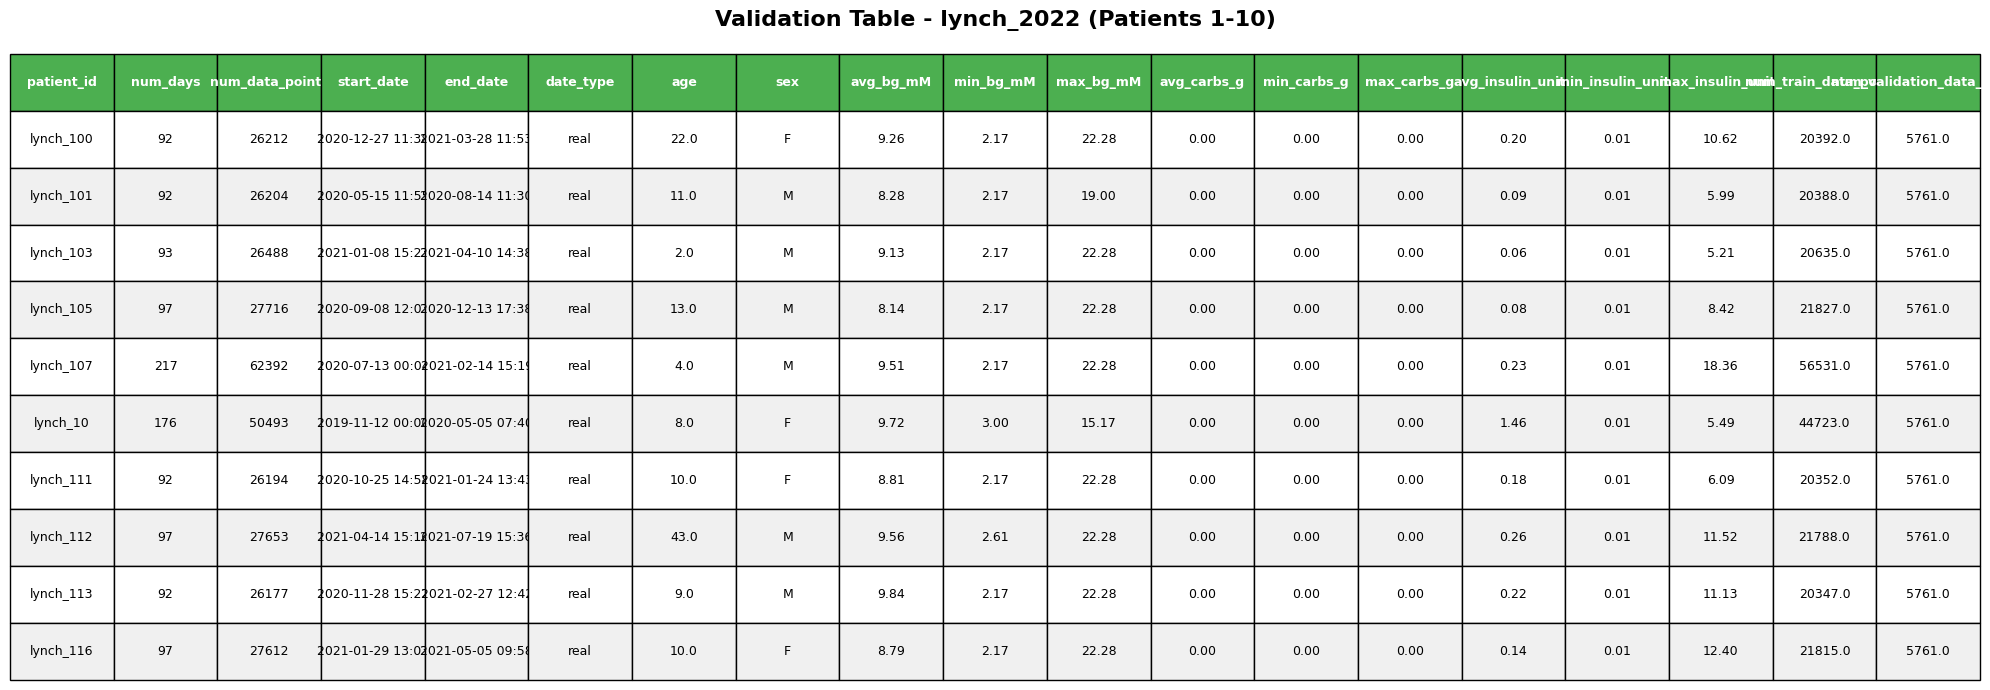

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Create the validation table
validation_table = loader.create_validation_table()

# Specify patient range to display (None for all patients)
patient_start = 0  # Start index (0-based)
patient_end = 10  # End index (exclusive), set to None for all patients

# Filter the table by patient range
if patient_end is not None:
    formatted_table = validation_table.iloc[patient_start:patient_end].copy()
    title_suffix = (
        f" (Patients {patient_start+1}-{min(patient_end, len(validation_table))})"
    )
else:
    formatted_table = validation_table.iloc[patient_start:].copy()
    title_suffix = f" (Patients {patient_start+1}-{len(validation_table)})"

# Create figure and axis
fig, ax = plt.subplots(figsize=(20, len(formatted_table) * 0.5 + 2))
ax.axis("tight")
ax.axis("off")

# Round numeric columns to 2 decimal places
numeric_cols = [
    "avg_bg_mM",
    "min_bg_mM",
    "max_bg_mM",
    "avg_carbs_g",
    "min_carbs_g",
    "max_carbs_g",
    "avg_insulin_units",
    "min_insulin_units",
    "max_insulin_units",
]

for col in numeric_cols:
    if col in formatted_table.columns:
        formatted_table[col] = formatted_table[col].apply(
            lambda x: f"{x:.2f}" if pd.notna(x) else "N/A"
        )

# Format date columns
date_cols = ["start_date", "end_date"]
for col in date_cols:
    if col in formatted_table.columns:
        formatted_table[col] = formatted_table[col].apply(
            lambda x: x.strftime("%Y-%m-%d %H:%M") if pd.notna(x) else "N/A"
        )

# Create the table
table = ax.table(
    cellText=formatted_table.values,
    colLabels=formatted_table.columns,
    cellLoc="center",
    loc="center",
    bbox=[0, 0, 1, 1],
)

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 1.5)

# Color header row
for i in range(len(formatted_table.columns)):
    table[(0, i)].set_facecolor("#4CAF50")
    table[(0, i)].set_text_props(weight="bold", color="white")

# Alternate row colors
for i in range(1, len(formatted_table) + 1):
    if i % 2 == 0:
        for j in range(len(formatted_table.columns)):
            table[(i, j)].set_facecolor("#f0f0f0")

plt.title(
    f"Validation Table - {loader.dataset_name}{title_suffix}",
    fontsize=16,
    weight="bold",
    pad=20,
)

plt.tight_layout()
plt.show()